# Poisson Equation

$$
\frac{\partial^2 u}{\partial x^2} = b  \qquad x \in [0,1]
$$

$$
u(0) = u(1) = 0, \qquad b = \sin(2\pi x)
$$

In [1]:
using Plots, BenchmarkTools
gr()

Plots.GRBackend()

In [2]:
function plot_solution(x, u)
    plot([0;x;1],[0;u;0], label="computed")
    scatter!([0;x;1],-sin.(2π*[0;x;1])/(4π^2),label="exact")
end

plot_solution (generic function with 1 method)

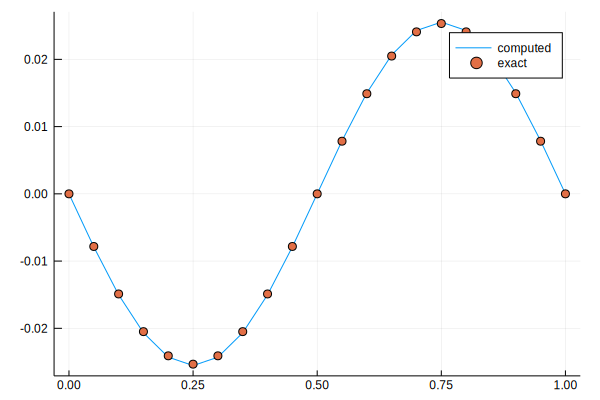

In [3]:
Δx = 0.05
x = Δx:Δx:1-Δx ## Solve only interior points: the endpoints are set to zero.
N = length(x)

A = zeros(N,N)
for i in 1:N, j in 1:N
    abs(i-j) <= 1 && (A[i,j] +=1)
    i==j          && (A[i,j] -=3)
end

B = sin.(2π*x) * Δx^2
u = A \ B

plot_solution(x, u)

# SparseArrays

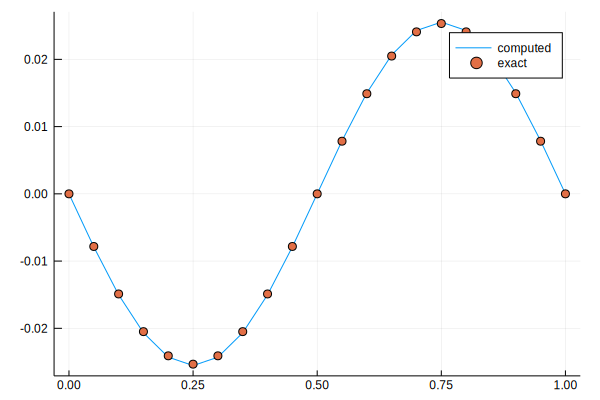

In [4]:
using SparseArrays

Δx = 0.05
x = Δx:Δx:1-Δx ## Solve only interior points: the endpoints are set to zero.
N = length(x)
B = sin.(2π*x) * Δx^2

P = spdiagm( -1 =>    ones(Float64,N-1),
              0 => -2*ones(Float64,N),
              1 =>    ones(Float64,N-1))

u = P \ B

plot_solution(x, u)

# LinearAlgebra

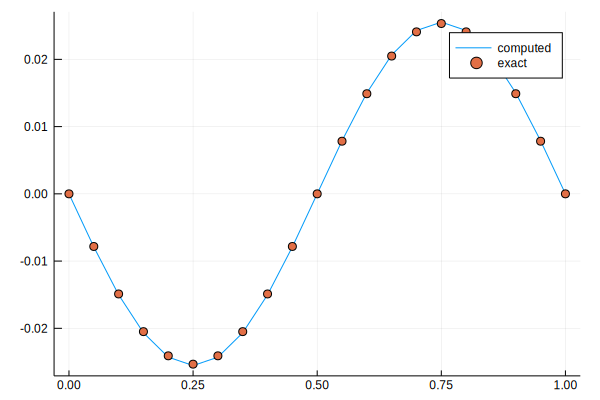

In [5]:
using LinearAlgebra

Δx = 0.05
x = Δx:Δx:1-Δx ## Solve only interior points: the endpoints are set to zero.
N = length(x)
B = sin.(2π*x) * Δx^2

DU =  ones(Float64, N-1)
D = -2ones(Float64, N)
DL =  ones(Float64, N-1)

T = Tridiagonal(DL, D, DU)

u = T \ B

plot_solution(x, u)

# LAPACK

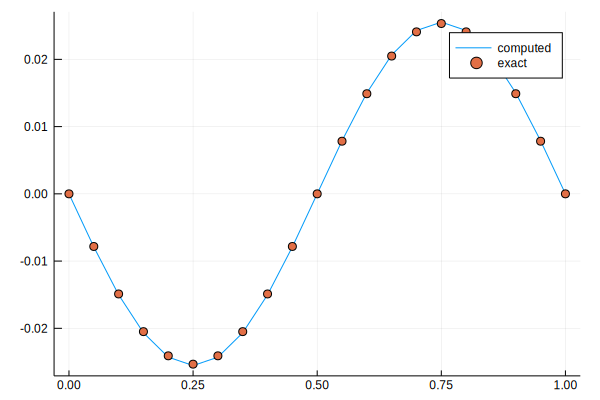

In [6]:
using LinearAlgebra

Δx = 0.05
x = Δx:Δx:1-Δx ## Solve only interior points: the endpoints are set to zero.
N = length(x)
B = sin.(2π*x) * Δx^2

DU =   ones(Float64, N-1)
D  = -2ones(Float64, N)
DL =   ones(Float64, N-1)

LAPACK.gtsv!(DL, D, DU, B)

plot_solution(x, B)

# DIffEqOperators.jl

[docs](http://docs.juliadiffeq.org/latest/features/diffeq_operator.html)

In [7]:
using DiffEqOperators

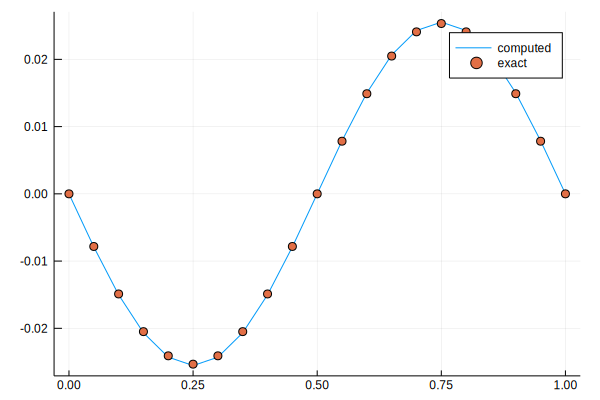

In [8]:
Δx = 0.05
x = Δx:Δx:1-Δx ## Solve only interior points: the endpoints are set to zero.
N = length(x)
B = sin.(2π*x)

# Second order approximation to the second derivative
order = 2
deriv = 2

A = DerivativeOperator{Float64}(order, deriv, Δx, N, :Dirichlet0,:Dirichlet0)

u = A \ B

plot_solution(x, u)

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*